<a href="https://colab.research.google.com/github/asgardian1196/asg-ml/blob/main/CNN_Citrus_Leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## 1. What are Convolutional Neural Networks

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other

## 2. Why CNNs were introduced when Fully connected ANNs were already there

CNN or Convolutional Neural Networks, for certain classes of problems, are better at capturing local information, (nearby neighbors), require less training, and are less susceptible to overfitting. They are constructed by having one or more convolutional units, (units that receive input from more than 1 unit from the previous layer.) This is a remarkable thing that allows them to consider contextual information in small local groups. It also reduces the number of units in the network because of the many to one mapping. ANN does not have these specificities.

## 3. What is meant by the following terms: convolutional layer, pooling layer, padding, stride

### Convolutional Layer
Convolutional layers are the major building blocks used in convolutional neural networks. A convolution is the simple application of a filter to an input that results in an activation. Repeated application of the same filter to an input results in a map of activations called a feature map, indicating the locations and strength of a detected feature in an input, such as an image.

### Pooling Layer

Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. Two common pooling methods are average pooling and max pooling that summarize the average presence of a feature and the most activated presence of a feature respectively.

### Padding
A tricky issue when applying convolutional layers is that we tend to lose pixels on the perimeter of our image. Since we typically use small kernels, for any given convolution, we might only lose a few pixels, but this can add up as we apply many successive convolutional layers. One straightforward solution to this problem is to add extra pixels of filler around the boundary of our input image, thus increasing the effective size of the image. Typically, we set the values of the extra pixels to zero. This is called as padding

### Stride

When computing the cross-correlation, we start with the convolution window at the upper-left corner of the input tensor, and then slide it over all locations both down and to the right. In previous examples, we default to sliding one element at a time. However, sometimes, either for computational efficiency or because we wish to downsample, we move our window more than one element at a time, skipping the intermediate locations. We refer to the number of rows and columns traversed per slide as the stride. 





## 4. What would be the size of the output if input is n^2, filter is f^2 and stride is of s 

 $$(n-f)/s + 1$$

## 5. What are pre-trained models and what do you mean by transfer learning

Transfer Learning is a machine learning method where we reuse a pre-trained model as the starting point for a model on a new task. To put it simply—a model trained on one task is repurposed on a second, related task as an optimization that allows rapid progress when modeling the second task

## 6. Discuss CPU vs GPU vs TPU

The difference between CPU, GPU and TPU is that the CPU handles all the logics, calculations, and input/output of the computer, it is a general-purpose processor. In comparison, GPU is an additional processor to enhance the graphical interface and run high-end tasks. TPUs are powerful custom-built processors to run the project made on a specific framework, i.e. TensorFlow.

CPU: Central Processing Unit. Manage all the functions of a computer.
GPU: Graphical Processing Unit. Enhance the graphical performance of the computer.
TPU: Tensor Processing Unit. Custom build ASIC to accelerate TensorFlow projects.

## 7. Perform CNN classification on citrus leaves dataset from tensorflow 
##     (try to achieve minimum 90% accuracy and above on the test set)
##     Can be found using the link: https://www.tensorflow.org/datasets/catalog/citrus_leaves

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [ ]:
(train_citrus_data, val_citrus_data, test_citrus_data), info = tfds.load('citrus_leaves',
                                                split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                                with_info=True,as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/citrus_leaves/0.1.1.incompleteFRARN1/citrus_leaves-train.tfrecord


  0%|          | 0/594 [00:00<?, ? examples/s]

Dataset citrus_leaves downloaded and prepared to /root/tensorflow_datasets/citrus_leaves/0.1.1. Subsequent calls will reuse this data.


In [ ]:
classes = info.features['label'].num_classes

In [ ]:
print("Total number of classes", classes)

Total number of classes 4


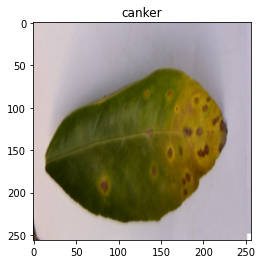

In [ ]:
get_labelname = info.features['label'].int2str

image, label = next(iter(train_citrus_data))
_ = plt.imshow(image)
_ = plt.title(get_labelname(label))

In [ ]:
image.shape

TensorShape([256, 256, 3])

In [ ]:
train_data = train_citrus_data.map(lambda x, y: (x, y), 
              num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
train_data = train_data.shuffle(buffer_size=len(train_citrus_data))

In [ ]:
train_data = train_data.batch(32)

In [ ]:
val_data = val_citrus_data.map(lambda x, y: (x, y), 
              num_parallel_calls=tf.data.AUTOTUNE)  

In [ ]:
test_data = test_citrus_data.map(lambda x, y: (x, y), 
              num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
val_data = val_data.batch(8)
test_data = test_data.batch(1)

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3),padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
 )

Epoch 1/15
15/15 [==============================] - 35s 2s/step - loss: 21.3837 - accuracy: 0.3158 - val_loss: 1.4104 - val_accuracy: 0.3167
Epoch 2/15
15/15 [==============================] - 38s 3s/step - loss: 1.3249 - accuracy: 0.4337 - val_loss: 1.0804 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 32s 2s/step - loss: 1.1035 - accuracy: 0.4716 - val_loss: 0.8774 - val_accuracy: 0.5667
Epoch 4/15
15/15 [==============================] - 33s 2s/step - loss: 0.8721 - accuracy: 0.5937 - val_loss: 0.7450 - val_accuracy: 0.6500
Epoch 5/15
15/15 [==============================] - 34s 2s/step - loss: 0.7172 - accuracy: 0.6884 - val_loss: 0.6796 - val_accuracy: 0.6167
Epoch 6/15
15/15 [==============================] - 32s 2s/step - loss: 0.6152 - accuracy: 0.7432 - val_loss: 0.6500 - val_accuracy: 0.6833
Epoch 7/15
15/15 [==============================] - 32s 2s/step - loss: 0.7609 - accuracy: 0.7011 - val_loss: 0.6811 - val_accuracy: 0.7333
Epoch 8/15
15/15 [=

## 8. Plot the model architecture and explain how did you decide number of layers, filter size and other hyper parameters

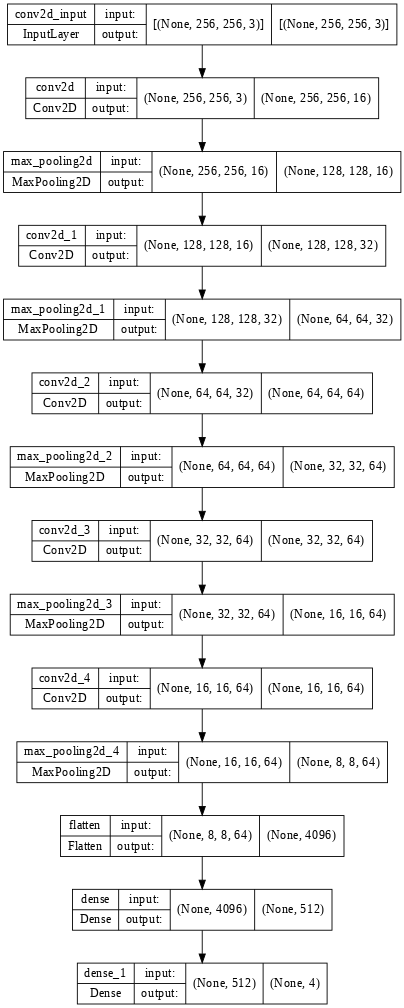

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0